<a href="https://colab.research.google.com/github/ocarane/ml_finished_projects/blob/main/Finaliza_site_(pt2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pré-processamento

In [93]:
import pandas as pd

uri = "https://raw.githubusercontent.com/ocarane/machine_learning/main/finaliza-site.csv"

dados = pd.read_csv(uri)

dados.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [66]:
mapa = {
    "expected_hours": "horas_esperadas",
    "price": "preco",
    "unfinished": "nao_finalizado"
}

dados = dados.rename(columns=mapa)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [67]:
x = dados[["horas_esperadas", "preco"]]
y = dados[["nao_finalizado"]]

#Parte 2

## Plotando o gráfico

<Axes: xlabel='horas_esperadas', ylabel='preco'>

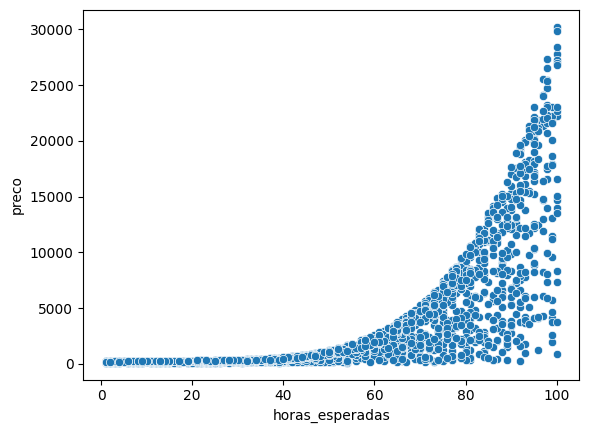

In [68]:
import seaborn as sns

sns.scatterplot(x="horas_esperadas", y="preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

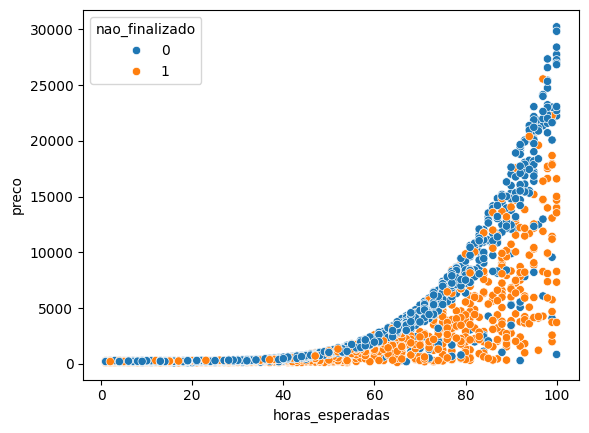

In [69]:
sns.scatterplot(x="horas_esperadas", y="preco", hue="nao_finalizado", data=dados)

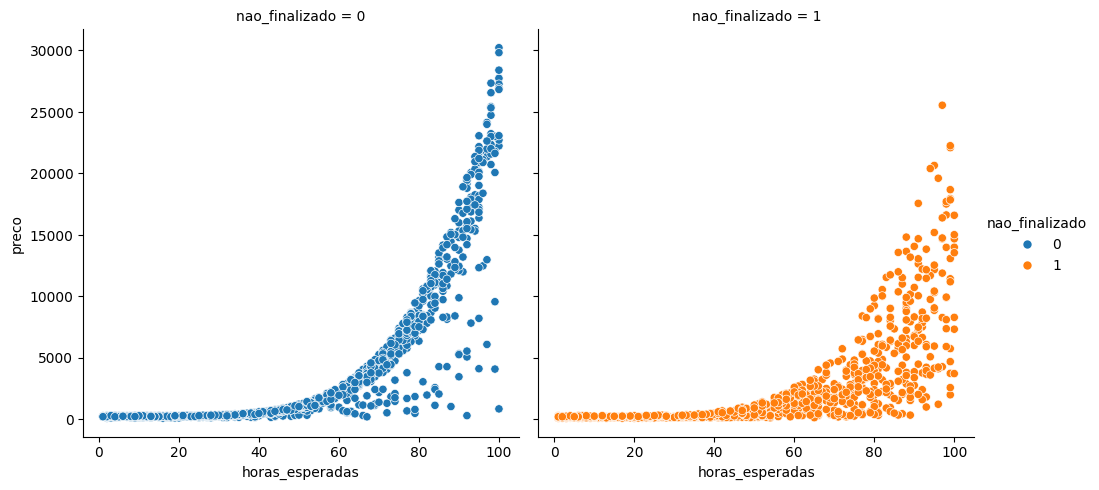

In [70]:
sns.relplot(x="horas_esperadas", y="preco", hue="nao_finalizado", col="nao_finalizado", data=dados)

## Balanceamento de Dados

In [71]:
dados.nao_finalizado.value_counts()

nao_finalizado
0    1134
1    1023
Name: count, dtype: int64

# Classificação Binária

In [72]:
from os import SEEK_DATA
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

In [73]:
#Separando treino e teste
seed = 0
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state=seed, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

from os import SEEK_DATA
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

#Criando um modelo
model = LinearSVC()

#Treinando o modelo
model.fit(train_x, train_y)

#Calculando a acurácia
Acuracia = model.score(test_x, test_y)

print("A acurácia foi de %.2f%%" % (Acuracia * 100))

Treinaremos com 1617 elementos e testaremos com 540 elementos


In [75]:
from sklearn.dummy import DummyClassifier

dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)
Acuracia = dummy_stratified.score(test_x, test_y)
print("A acurácia foi de %.2f%%" % (Acuracia * 100))

A acurácia foi de 52.59%


In [83]:
test_y[nao_fina]

,nao_finalizado
159,1
646,1
1158,0
2026,0
767,0
...,...
1667,0
1263,1
756,1
34,1


<Axes: xlabel='horas_esperadas', ylabel='preco'>

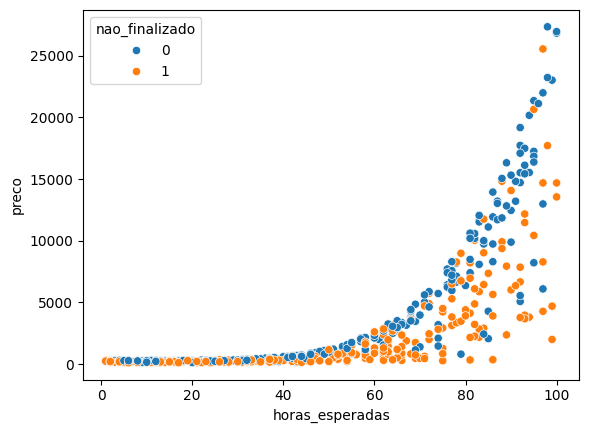

In [85]:
sns.scatterplot(x = "horas_esperadas", y = "preco", hue = test_y["nao_finalizado"], data = test_x)

1 100 100 27343


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


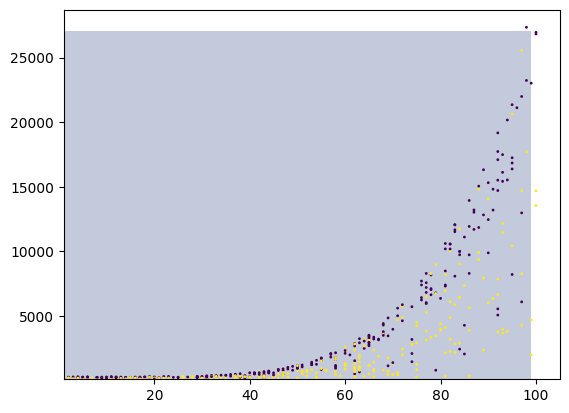

In [87]:
import numpy as np
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y["nao_finalizado"], s=1)


# DECISION BOUNDARY


#Novo Classificador SVC

In [91]:
#Separando treino e teste
seed = 0
train_x, test_x, train_y, test_y = train_test_split(x, y,random_state=seed, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

from os import SEEK_DATA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Criando um modelo
model = SVC(gamma = 'auto')

#Treinando o modelo
model.fit(train_x, train_y)

#Calculando a acurácia
Acuracia = model.score(test_x, test_y)

print("A acurácia foi de %.2f%%" % (Acuracia * 100))

Treinaremos com 1617 elementos e testaremos com 540 elementos


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A acurácia foi de 57.59%


1 100 100 27343


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


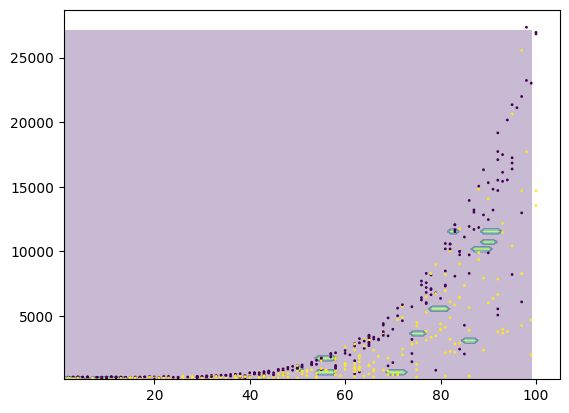

In [92]:
import numpy as np
x_min = test_x.horas_esperadas.min()
x_max = test_x.horas_esperadas.max()
y_min = test_x.preco.min()
y_max = test_x.preco.max()
print(x_min, x_max,y_min,y_max)


pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z


import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(test_x.horas_esperadas, test_x.preco, c=test_y["nao_finalizado"], s=1)


# DECISION BOUNDARY


In [112]:
from os import SEEK_DATA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

seed = 0
np.random.seed(seed)
raw_train_x, raw_test_x, train_y, test_y = train_test_split(x, y,random_state=seed, test_size = 0.25, stratify = y)
print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(train_x), len(test_x)))

scaler = StandardScaler()
scaler.fit(train_x)
train_x = scaler.transform(raw_train_x)
test_x = scaler.transform(raw_test_x)

#Criando um modelo
model = SVC(gamma = 'auto')

#Treinando o modelo
model.fit(train_x, train_y)

#Calculando a acurácia
Acuracia = model.score(test_x, test_y)

print("A acurácia foi de %.2f%%" % (Acuracia * 100))

Treinaremos com 1617 elementos e testaremos com 540 elementos
A acurácia foi de 68.15%


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


-1.7391643830792396 1.7413603251563607 -0.5921195225352496 4.762435573790005


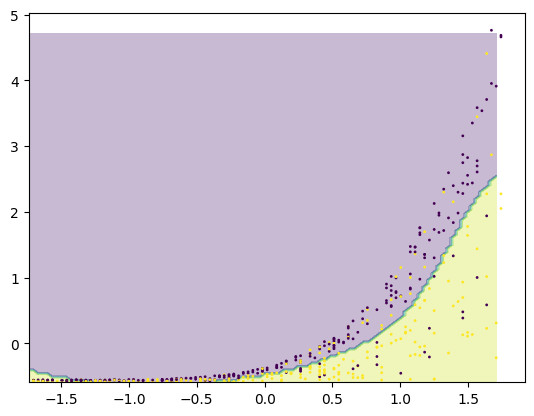

In [114]:
data_x = test_x[:,0]
data_y = test_x[:,1]

import numpy as np
x_min = data_x.min()
x_max = data_x.max()
y_min = data_y.min()
y_max = data_y.max()
print(x_min, x_max,y_min,y_max)

pixels = 100
eixo_x = np.arange(x_min, x_max, (x_max - x_min) / pixels)
eixo_y = np.arange(y_min, y_max, (y_max - y_min) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos


Z = model.predict(pontos)
Z = Z.reshape(xx.shape)

import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data_x, data_y, c=test_y["nao_finalizado"], s=1)


# DECISION BOUNDARY


In [115]:
teste = [[100,200]]
teste = scaler.transform(teste)
model.predict(teste)

array([1])

In [118]:
dummy_stratified = DummyClassifier()
dummy_stratified.fit(train_x, train_y)


SyntaxError: incomplete input (<ipython-input-118-d522fce4aadd>, line 3)